Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
wd=pd.read_csv('Datasets/Wine_Data.csv')
wd.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Performing EDA

In [3]:
wd.shape

(178, 14)

In [4]:
### there in missing values
wd.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [5]:
#there is categorical variables here
wd.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

In [6]:
#multi class classification problem
wd['Class'].unique()

array([0, 1, 2], dtype=int64)

In [7]:
#checking the each value count
wd['Class'].value_counts()

1    71
0    59
2    48
Name: Class, dtype: int64

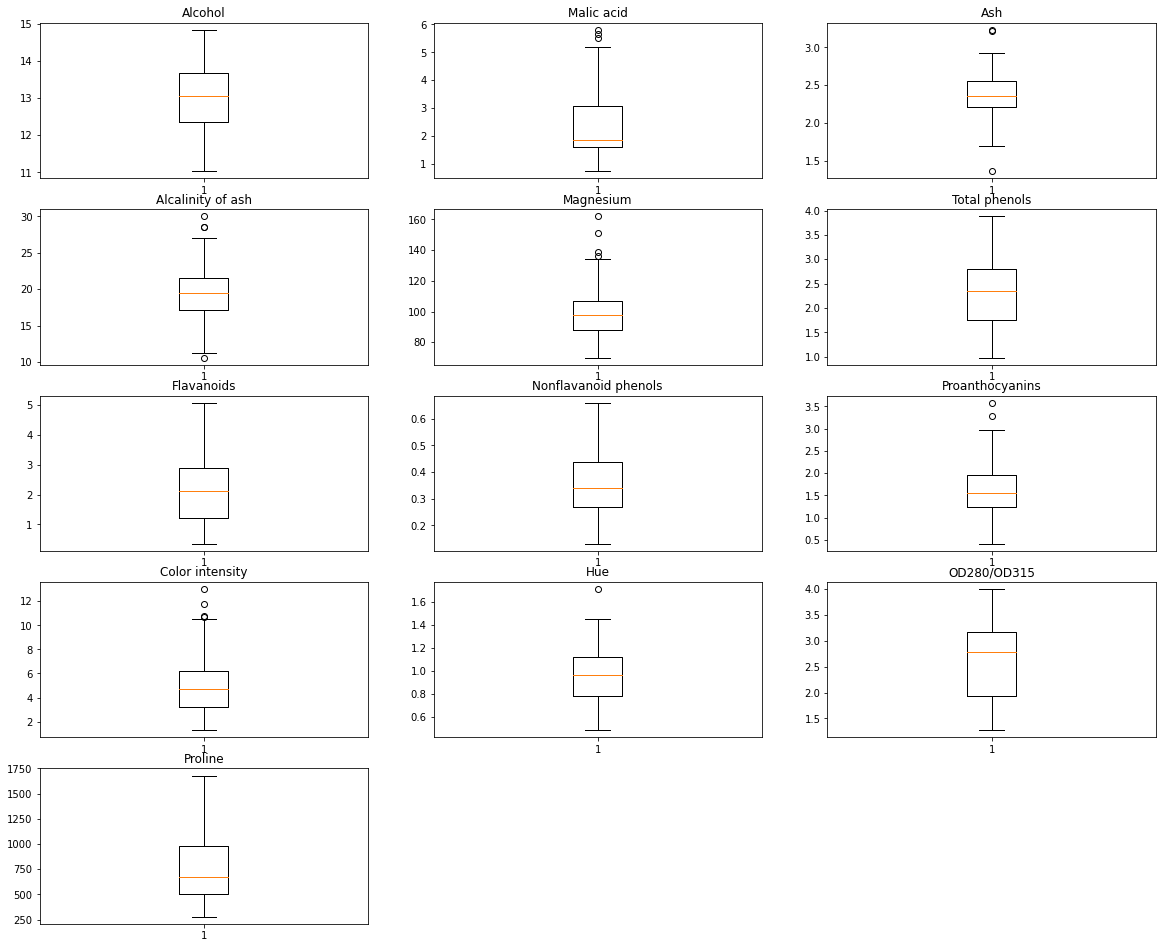

In [8]:
# detecting outliers
def detect_outliers():
    count=1
    plt.figure(figsize=(20,20))
    for col in wd.columns[1:]:
        plt.subplot(6,3,count)
        plt.boxplot(wd[col])
        plt.title(col)
        count +=1
    plt.show()
detect_outliers()
        
    

In [9]:
wd.shape

(178, 14)

In [10]:
#removing outliers
def remove_outliers(wd_in,col_name):
    q1=wd_in[col_name].quantile(0.25)
    q3=wd_in[col_name].quantile(0.75)
    iqr=q3-q1
    fence_low=q1-1.5*iqr
    fence_high=q3+1.5*iqr
    wd_out=wd_in.loc[(wd_in[col_name]>fence_low)&(wd_in[col_name]<fence_high)]
    return wd_out

In [11]:
wd.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

In [12]:
for col in wd.columns[1:]:
    wd=remove_outliers(wd,col)

In [13]:
#After removing outliers
wd.shape

(161, 14)

In [14]:
#checking correlation
wd.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
Class,1.000000,-0.366803,0.457475,-0.069204,0.575033,-0.250621,-0.752270,-0.881268,0.503821,-0.598729,0.229396,-0.630956,-0.794543,-0.642628
Alcohol,-0.366803,1.000000,0.096651,0.225343,-0.338434,0.421233,0.325599,0.302557,-0.175275,0.215463,0.540855,-0.010480,0.108512,0.652425
Malic acid,0.457475,0.096651,1.000000,0.183716,0.311024,0.030146,-0.369455,-0.460262,0.299642,-0.241993,0.304192,-0.582454,-0.399525,-0.182090
Ash,-0.069204,0.225343,0.183716,1.000000,0.320691,0.421118,0.106043,0.043875,0.090586,0.031043,0.210859,-0.043165,-0.032896,0.271846
Alcalinity of ash,0.575033,-0.338434,0.311024,0.320691,1.000000,-0.176902,-0.453056,-0.507433,0.340402,-0.308068,-0.031718,-0.318442,-0.375677,-0.472429
Magnesium,-0.250621,0.421233,0.030146,0.421118,-0.176902,1.000000,0.239446,0.199186,-0.235835,0.099609,0.346902,-0.021651,0.021406,0.449599
Total phenols,-0.752270,0.325599,-0.369455,0.106043,-0.453056,0.239446,1.000000,0.882622,-0.497526,0.642021,-0.065892,0.471543,0.706372,0.515427
Flavanoids,-0.881268,0.302557,-0.460262,0.043875,-0.507433,0.199186,0.882622,1.000000,-0.597872,0.737851,-0.171084,0.589664,0.784737,0.524336
Nonflavanoid phenols,0.503821,-0.175275,0.299642,0.090586,0.340402,-0.235835,-0.497526,-0.597872,1.000000,-0.430748,0.110328,-0.279525,-0.525896,-0.310505
Proanthocyanins,-0.598729,0.215463,-0.241993,0.031043,-0.308068,0.099609,0.642021,0.737851,-0.430748,1.000000,-0.041662,0.345698,0.585839,0.367174


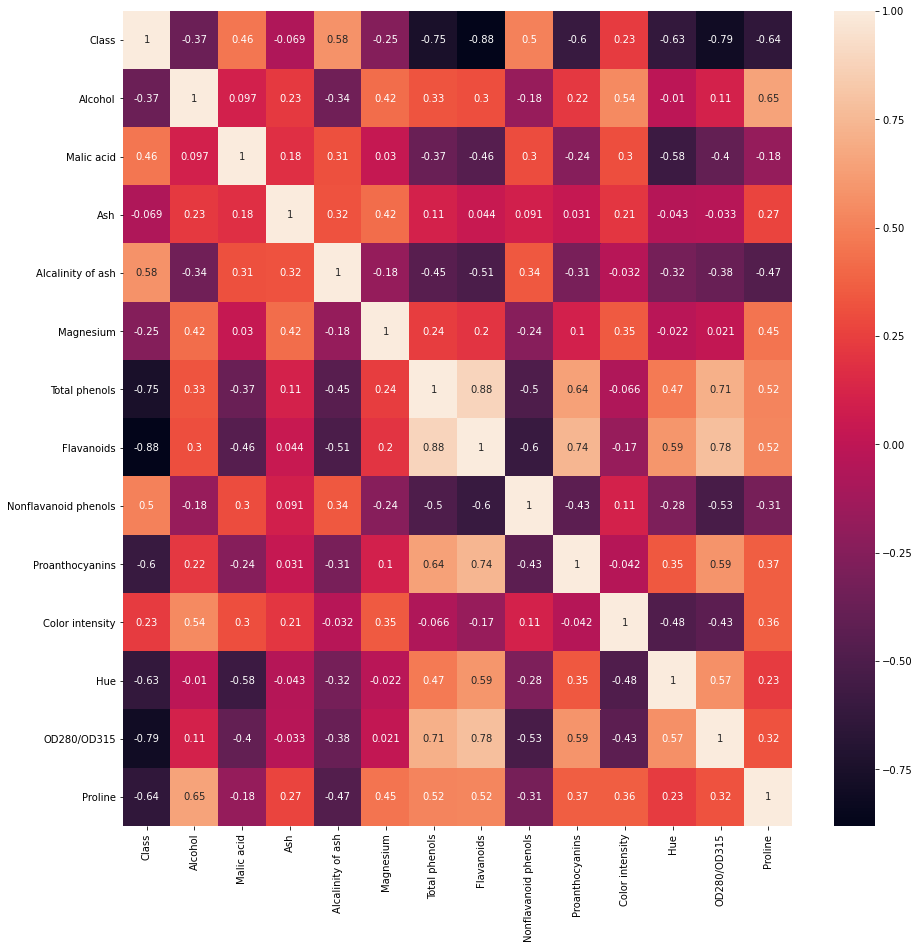

In [15]:
#using heatmap visualising the correaltion
plt.figure(figsize=(15,15))
import seaborn as sns
corr=wd.corr()
sns.heatmap(corr,annot=True)

In [16]:
#droping of Ash coulmn beacuse of low corellation with response
wd.drop(['Ash'],axis=1,inplace=True)

In [17]:
wd.head()

,Class,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
#seperating X and y
x=wd.iloc[:,1:].values
y=wd.iloc[:,0].values

In [19]:
#splitting in training and testing values
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Model Building

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression(solver='newton-cg',multi_class='ovr')

In [23]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', solver='newton-cg')

In [24]:
#predictions
y_pred=model.predict(x_test)

In [25]:
dict1={
    'Y_pred':y_pred,
    'Y_test':y_test
}
eval_wd=pd.DataFrame(dict1)

In [26]:
eval_wd

,Y_pred,Y_test
0,1,1
1,1,1
2,2,2
3,0,0
4,0,0
5,1,1
6,2,2
7,1,1
8,1,1
9,1,1


Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

In [28]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  8]], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

0.9696969696969697

In [30]:
r2_score(y_test,y_pred)

0.9496951219512195